# Load Data

In [1]:
# Import libs

# Libs for modeling
import numpy as np
import pandas as pd
import random

# Libs for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Lib to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
dataset = pd.read_csv('csv_result-ebay_confianca_completo.csv')
dataset.shape

(5806, 75)

In [3]:
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [4]:
# added later to ensure the algorithm would work
dataset['blacklist'] = dataset['blacklist'] == 'S'

In [5]:
# null analysis
dataset.isnull().sum()

feedbacks                  0
reviews                    0
blacklist                  0
mextraversion              0
cextraversion              0
                          ..
value_openess              0
value_hedonism             0
value_selfenhancement      0
value_selftranscendence    0
reputation                 0
Length: 75, dtype: int64

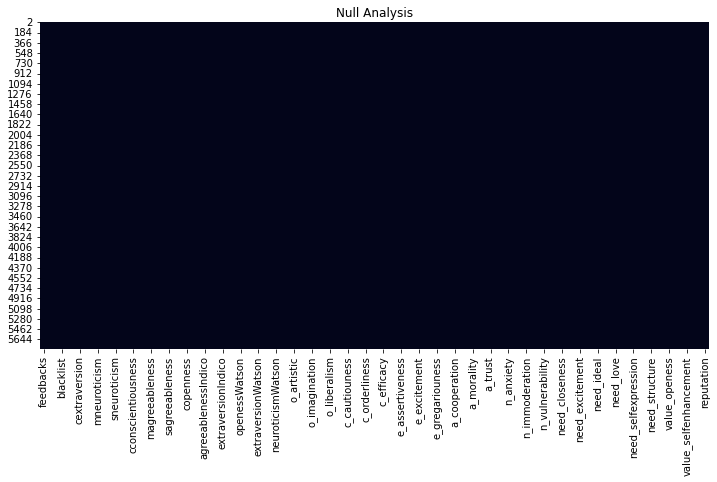

In [6]:
# null analysis
plt.figure( figsize=(12,6))
plt.title('Null Analysis')
sns.heatmap( dataset.isnull(), cbar=False );

In [7]:
# reputation analysis
dataset.groupby('reputation')['reputation'].count()

reputation
Bom     4299
Ruim    1507
Name: reputation, dtype: int64

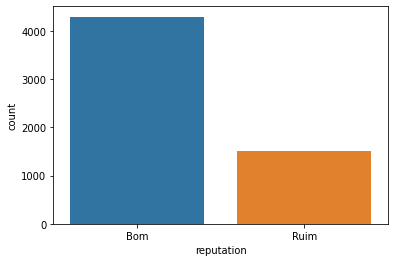

In [8]:
# reputation analysis
sns.countplot(dataset['reputation']);

# Split data

In [9]:
len(dataset.columns)

75

In [10]:
# split dataset into x and y sets
X = dataset.iloc[:, 0:74].values
X.shape

(5806, 74)

In [11]:
y = dataset.iloc[:,74].values
y.shape

(5806,)

In [12]:
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

In [13]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

# Training and test

In [14]:
# import sklearn to train our model
from sklearn.model_selection import train_test_split

In [15]:
# create training and test
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [16]:
X_training.shape, y_training.shape

((4644, 74), (4644,))

In [17]:
X_test.shape, y_test.shape

((1162, 74), (1162,))

In [18]:
# check percentage between the splitted dataset
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [19]:
4299 / len(dataset), 1507 / len(dataset)

(0.7404409231829142, 0.2595590768170858)

In [20]:
np.unique(y_training, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3439, 1205]))

In [21]:
1205 / len(y_training)

0.2594745908699397

In [22]:
np.unique(y_test, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([860, 302]))

In [23]:
302 / len(y_test)

0.25989672977624784

#  Random Forest Classification

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier()
model.fit(X_training, y_training)

RandomForestClassifier()

In [27]:
predicted = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)

0.7452667814113597

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted, y_test)
cm

array([[853, 289],
       [  7,  13]])

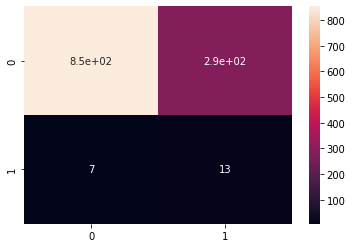

In [30]:
sns.heatmap( cm, annot=True);

In [31]:
# check model accuracy

total_valid = cm[0,0] + cm[1,1]
total_errors = cm[0,1] + cm[1,0]
total_total = total_valid + total_errors

type_1_valid = cm[0,0]
type_1_errors = cm[0,1]
type_1_total = type_1_valid + type_1_errors

type_2_valid = cm[1,1]
type_2_errors = cm[1,0]
type_2_total = type_2_valid + type_2_errors


print(
    "Model accuracy"
    "\n        Valid - Errors - %%"
    "\nTotal : %2i - %2i - %2.2f%%" % (total_valid, total_errors, total_valid/total_total*100),
    "\nType 1: %2i - %i - %2.2f%%" % (type_1_valid, type_1_errors, type_1_valid/type_1_total*100),
    "\nType 2: %2i - %2i - %2.2f%%" % (type_2_valid, type_2_errors, type_2_valid/type_2_total*100),
)

Model accuracy
        Valid - Errors - %
Total : 866 - 296 - 74.53% 
Type 1: 853 - 289 - 74.69% 
Type 2: 13 -  7 - 65.00%


# Undersampling and Oversampling

In [32]:
# undersampling

from imblearn.under_sampling import TomekLinks

In [34]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [35]:
X_under.shape, y_under.shape

((5417, 74), (5417,))

In [36]:
# original dataset
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [37]:
# undersampling set (with reduced cases for the majority class)
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))

In [38]:
# create training and test
X_training_u, X_test_u, y_training_u, y_test_u = train_test_split(X_under, y_under, test_size = 0.2, stratify = y_under)

X_training_u.shape, X_test_u.shape

((4333, 74), (1084, 74))

In [39]:
model_u = RandomForestClassifier()
model_u.fit(X_training_u, y_training_u)
predicted_u = model_u.predict(X_test_u)
accuracy_score(y_test_u,predicted_u ) 

0.7333948339483395

In [40]:
cm_u = confusion_matrix(predicted_u,y_test_u)
cm_u

array([[771, 278],
       [ 11,  24]])

In [41]:
# check model accuracy

total_valid_u = cm_u[0,0] + cm_u[1,1]
total_errors_u = cm_u[0,1] + cm_u[1,0]
total_total_u = total_valid_u + total_errors_u

type_1_valid_u = cm_u[0,0]
type_1_errors_u = cm_u[0,1]
type_1_total_u = type_1_valid_u + type_1_errors_u

type_2_valid_u = cm_u[1,1]
type_2_errors_u = cm_u[1,0]
type_2_total_u = type_2_valid_u + type_2_errors_u


print(
    "Model accuracy"
    "\n        Valid - Errors - %%"
    "\nTotal : %2i - %2i - %2.2f%%" % (total_valid_u, total_errors_u, total_valid_u/total_total_u*100),
    "\nType 1: %2i - %i - %2.2f%%" % (type_1_valid_u, type_1_errors_u, type_1_valid_u/type_1_total_u*100),
    "\nType 2: %2i - %2i - %2.2f%%" % (type_2_valid_u, type_2_errors_u, type_2_valid_u/type_2_total_u*100),
)

Model accuracy
        Valid - Errors - %
Total : 795 - 289 - 73.34% 
Type 1: 771 - 278 - 73.50% 
Type 2: 24 - 11 - 68.57%


In [42]:
# check model accuracy

print(
    "Model accuracy - Original model versus Undersampling"
    "\nTotal : %2.2f%% - %2.2f%%" % (total_valid/total_total*100, total_valid_u/total_total_u*100),
    "\nType 1: %2.2f%% - %2.2f%%" % (type_1_valid/type_1_total*100, type_1_valid_u/type_1_total_u*100),
    "\nType 2: %2.2f%% - %2.2f%%" % (type_2_valid/type_2_total*100, type_2_valid_u/type_2_total_u*100),
)

Model accuracy - Original model versus Undersampling
Total : 74.53% - 73.34% 
Type 1: 74.69% - 73.50% 
Type 2: 65.00% - 68.57%


In [43]:
# oversampling

from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [45]:
X_over.shape, y_over.shape

((8598, 74), (8598,))

In [46]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [47]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [48]:
X_training_o, X_test_o, y_training_o, y_test_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [49]:
X_training_o.shape, X_test_o.shape

((6878, 74), (1720, 74))

In [50]:
model_o = RandomForestClassifier()
model_o.fit(X_training_o, y_training_o)
predicted_o = model_o.predict(X_test_o)
accuracy_score(y_test_o,predicted_o ) 

0.813953488372093

In [51]:
cm_o = confusion_matrix(predicted_o,y_test_o)
cm_o

array([[700, 160],
       [160, 700]])

In [52]:
# check model accuracy

total_valid_o = cm_o[0,0] + cm_o[1,1]
total_errors_o = cm_o[0,1] + cm_o[1,0]
total_total_o = total_valid_o + total_errors_o

type_1_valid_o = cm_u[0,0]
type_1_errors_o = cm_u[0,1]
type_1_total_o = type_1_valid_u + type_1_errors_o

type_2_valid_o = cm_o[1,1]
type_2_errors_o = cm_o[1,0]
type_2_total_o = type_2_valid_o + type_2_errors_o


print(
    "Model accuracy"
    "\n        Valid - Errors - %%"
    "\nTotal : %2i - %2i - %2.2f%%" % (total_valid_o, total_errors_o, total_valid_o/total_total_o*100),
    "\nType 1: %2i - %i - %2.2f%%" % (type_1_valid_o, type_1_errors_o, type_1_valid_o/type_1_total_o*100),
    "\nType 2: %2i - %2i - %2.2f%%" % (type_2_valid_o, type_2_errors_o, type_2_valid_o/type_2_total_o*100),
)

Model accuracy
        Valid - Errors - %
Total : 1400 - 320 - 81.40% 
Type 1: 771 - 278 - 73.50% 
Type 2: 700 - 160 - 81.40%


In [53]:
# check model accuracy

print(
    "Model accuracy"
    "\nOriginal model versus Undersampling and Oversampling"
    "\nTotal : %2.2f%% - %2.2f%% - %2.2f%%" % (total_valid/total_total*100, total_valid_u/total_total_u*100, total_valid_o/total_total_o*100),
    "\nType 1: %2.2f%% - %2.2f%% - %2.2f%%" % (type_1_valid/type_1_total*100, type_1_valid_u/type_1_total_u*100, type_1_valid_o/type_1_total_o*100),
    "\nType 2: %2.2f%% - %2.2f%% - %2.2f%%" % (type_2_valid/type_2_total*100, type_2_valid_u/type_2_total_u*100, type_2_valid_o/type_2_total_o*100),
)

Model accuracy
Original model versus Undersampling and Oversampling
Total : 74.53% - 73.34% - 81.40% 
Type 1: 74.69% - 73.50% - 73.50% 
Type 2: 65.00% - 68.57% - 81.40%


In [54]:
# We can make our model more accurate when applying the undersampling or oversampling techniques. In this case, oversampling worked better.